In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Flyzy Flight Cancellation - Sheet1.csv')

In [3]:
df.head()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.0,1.600779,0.159718,1
2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.0,4.406848,0.256803,0
3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.0,0.998757,0.504077,1
4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.0,3.806206,0.019638,0


In [4]:
df.shape

(3000, 14)

In [5]:
# Check for missing value in any colum
df.isnull().sum()

Flight ID                        0
Airline                          0
Flight_Distance                  0
Origin_Airport                   0
Destination_Airport              0
Scheduled_Departure_Time         0
Day_of_Week                      0
Month                            0
Airplane_Type                    0
Weather_Score                    0
Previous_Flight_Delay_Minutes    0
Airline_Rating                   0
Passenger_Load                   0
Flight_Cancelled                 0
dtype: int64

### The dataset shows that there are no missing values

Outliers Detection:


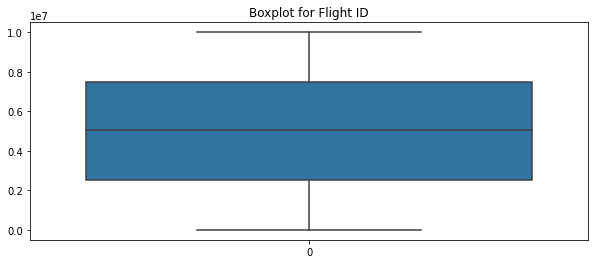

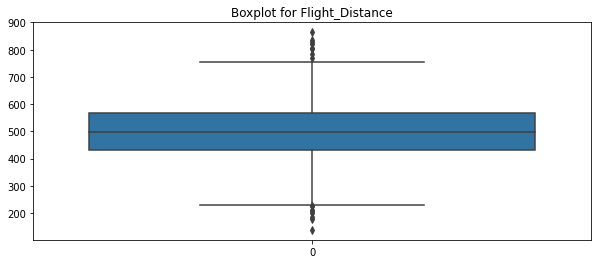

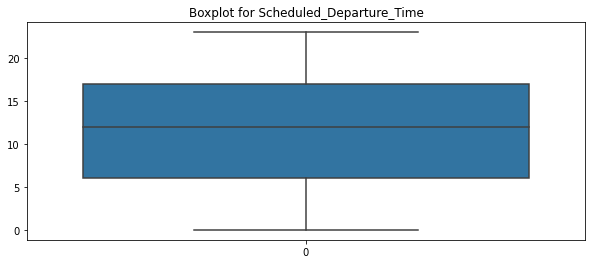

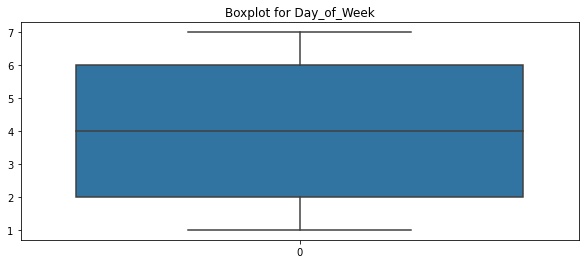

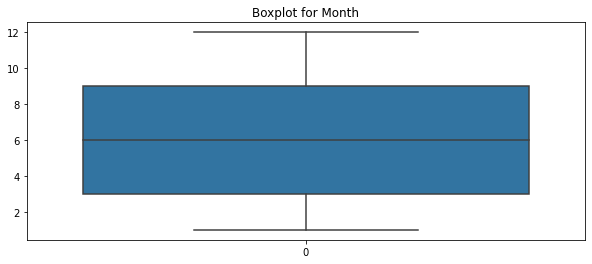

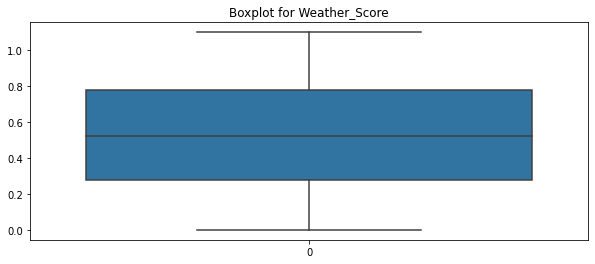

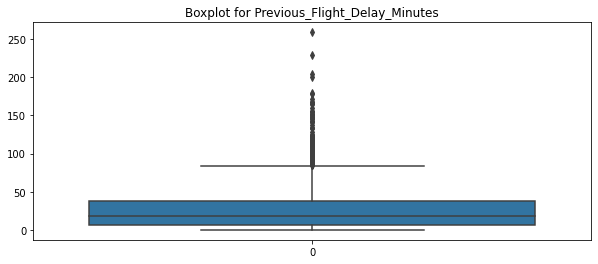

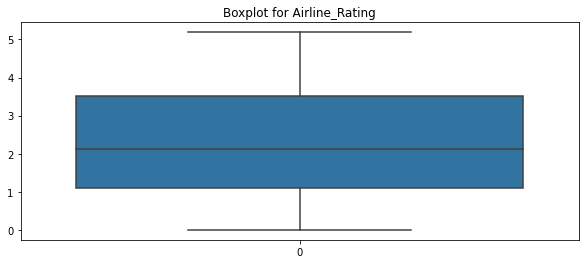

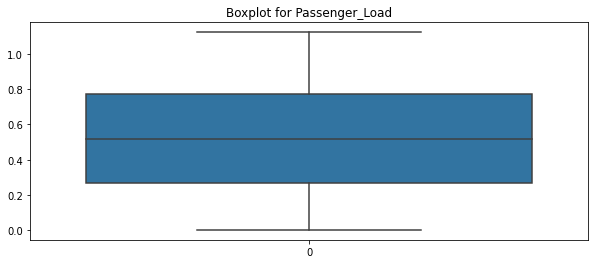

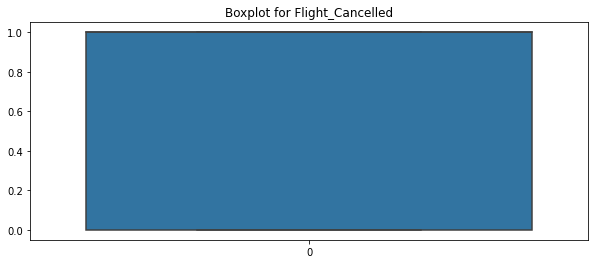

In [7]:
# Check for outliers using boxplots
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

print("Outliers Detection:")
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

### I detected outliers in numerical columns using boxplots and capped them at the 5th and 95th percentiles.

In [9]:
# Cap the outliers for relevant columns
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return np.clip(series, lower_bound, upper_bound)

# Applying capping on columns with visible outliers
df['Flight_Distance'] = cap_outliers(df['Flight_Distance'])
df['Previous_Flight_Delay_Minutes'] = cap_outliers(df['Previous_Flight_Delay_Minutes'])

Outliers Detection:


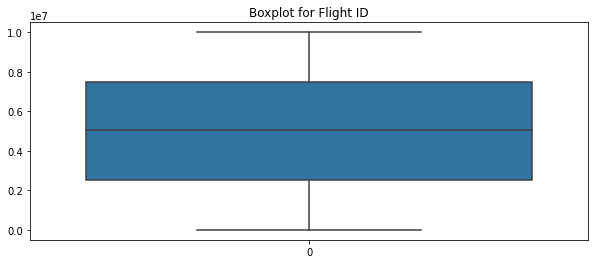

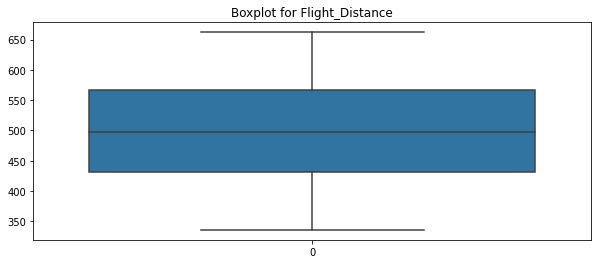

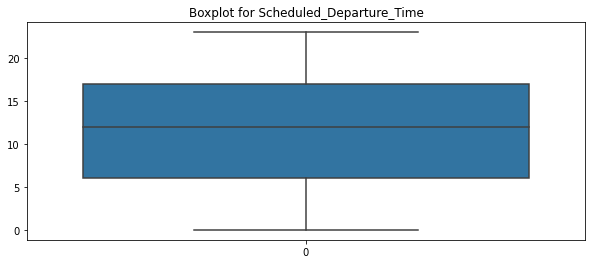

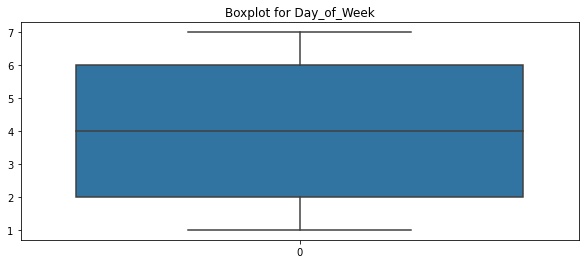

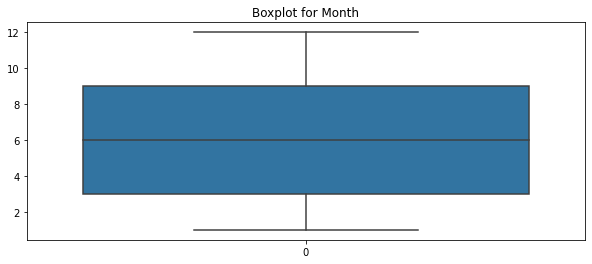

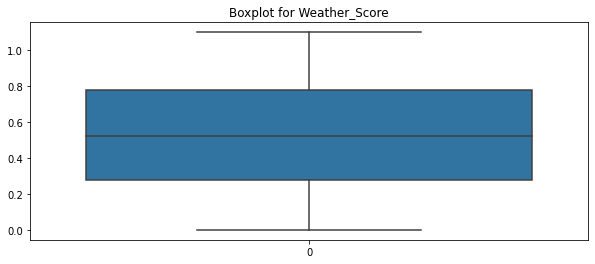

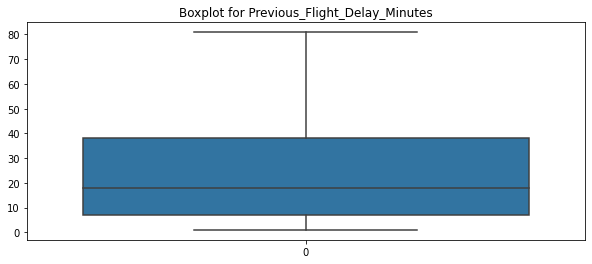

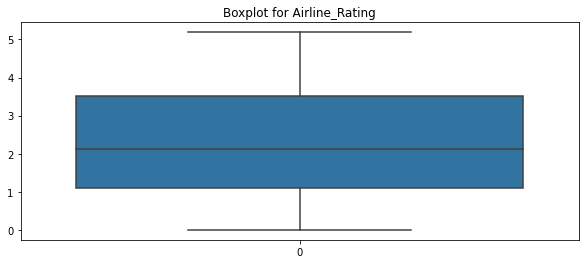

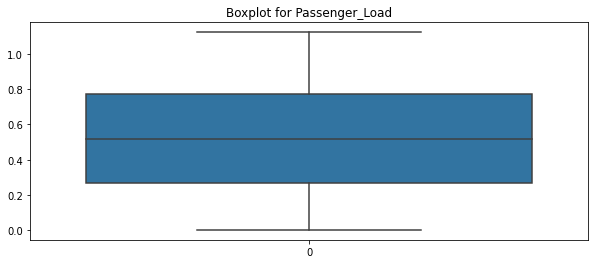

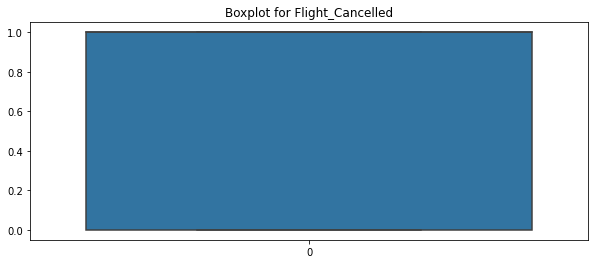

In [11]:
# Checking if outliers are still there
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

print("Outliers Detection:")
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [13]:
print("Data Types Before Conversion:")
print(df.dtypes)
print("\n")

Data Types Before Conversion:
Flight ID                          int64
Airline                           object
Flight_Distance                    int64
Origin_Airport                    object
Destination_Airport               object
Scheduled_Departure_Time           int64
Day_of_Week                        int64
Month                              int64
Airplane_Type                     object
Weather_Score                    float64
Previous_Flight_Delay_Minutes    float64
Airline_Rating                   float64
Passenger_Load                   float64
Flight_Cancelled                   int64
dtype: object




In [14]:
df['object'] = df['object'].astype('category')

KeyError: 'object'